### 1st Virtual Methods Seminar: Methods of Computational Social Science
## Introduction to Social Network Science with Python
# Network Construction & Visualization (Exercise 2.1)
Instructors: Haiko Lietz & Olga Zagovora

Date: September 23, 2020

## Packages

In [ ]:
import sys
libs_path = '../libs/'
sys.path.append(libs_path)
import compsoc as cs

In [ ]:
import networkx as nx
import pandas as pd

## Introduction

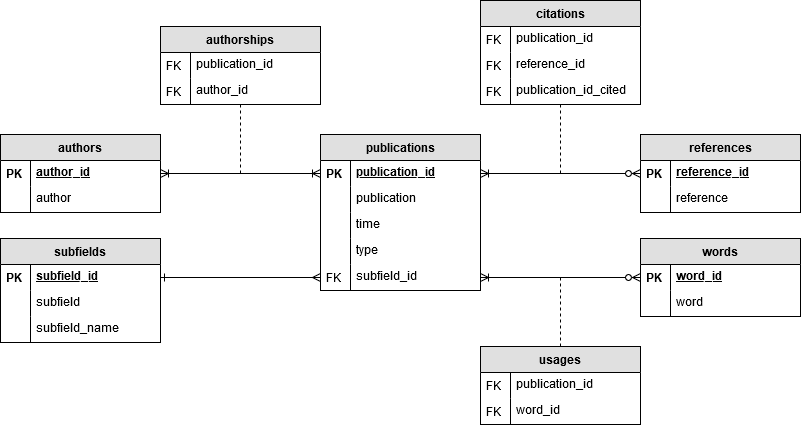

In this exercise, we will take a look at the scholarly field of Social Network Science (1916-2012). It will be our example dataset to learn to get traction on the functions `compsoc` provides to make network analysis easier for us. In particular, we will construct and draw a co-authorship network. Load the dataset using the `sns_collection()` function:

In [ ]:
publications, subfields, authors, authorships, words, usages = cs.sns_collection(path='../../data/sns/')

Get familiar with this data collection. Above you see the entity relationship model. **Take a look** at the `publications`, `authors`, and `authorships` tables. See how identifiers are used in these tables and where attributes are stored:

In [ ]:
publications.info()

The data needs preprocessing before it can be used.

(1) Extract all authorships since 2010. First extract all publications published since 2010, ...

In [ ]:
publications_2010 = publications[publications['time'] >= 2010]['publication_id']
publications_2010

... then extract all authorships in which those publications were authored:

In [ ]:
authorships_2010 = authorships[authorships['publication_id'].isin(publications_2010)].copy()
authorships_2010

(2) Remove publications with exceptionally many authors. First identify the team size per publication, ...

In [ ]:
team_size = authorships_2010.groupby('publication_id').size()

In [ ]:
team_size

... then remove from this dataframe column those publications with (mean + 3 dtandard deviations) or more authors, ...

In [ ]:
publication_ids = team_size[team_size < team_size.mean()+3*team_size.std()].index

... and only keep the respective `authorships`:

In [ ]:
authorships_2010 = authorships_2010[authorships_2010['publication_id'].isin(publication_ids)]

(3) Assign a unit weight to be used as cell values for matrix construction. These ones mean that each author authors a publication only once:

In [ ]:
authorships_2010.loc[:, 'weight'] = 1
authorships_2010.head()

## Exercise 1
Project the `authorships_2010` selection matrix to the author `co_authorships_2010` matrix using the `project_selection_matrix()` function. Project to the `'facts'` mode and use normalization. What are the names of the 20 most connected authors?

Hints:
- Read the description of the `project_selection_matrix()` function in the compsoc.py file.
- To find the author names, merge the original `authors` dataframe (where the name is) with the `author_attributes_2010` dataframe (the second dataframe created by the `project_selection_matrix()` function, where the degree is): `pd.merge(left=authors, right=author_attributes_2010, on='author_id', how='left')`

## Solution 1

---

## Exercise 2
Construct the undirected co-authorship graph. Use node degree as the default node size. Give a basic description of the whole graph as well as the largest connected component.

Hints:
- Read the description of the `construct_graph()` function in the compsoc.py file.
- The largest connected component of a graph `G` is `G.subgraph(max(nx.connected_components(G), key=len))`.

## Solution 2

---

## Exercise 3
Draw the largest connected component of the co-authorship graph. Make sure that node degree is used as the default node size. Compute node positions and store them in a variable.

Hint: Read the description of the `draw_graph()` function in the compsoc.py file.
## Solution 3

---

## Exercise 4
Change node size from `degree` to `weight` (the number of publications an author has authored).

Hint: Read the description of the `draw_graph()` function in the compsoc.py file. What type of object does the `node_size` parameter need as input?
## Solution 4